In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing, model_selection
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import json
import random

### Data Preparation

In [2]:
def get_dataset(directory, lag, excluded_name=[]):
    data = pd.DataFrame(columns=['data', 'label'])
    for foldername in os.listdir(directory):        
        folder = os.path.join(directory, foldername)
        # print(folder)
        if str(lag) in folder:
            # print(os.listdir(folder))
            for name in os.listdir(folder):
                if name in excluded_name:
                    # print(name)
                    continue
                filename = os.path.join(folder, name)
                # print(filename)
                for files in os.listdir(filename):
                    rel_path = os.path.join(filename, files)
                    # print(rel_path)
                    temp_label = folder
                    if "autism" in temp_label:
                        label = 'autism'
                    else:
                        label = 'normal'

                    temp_data = pd.DataFrame(columns=['data', 'label'], index=[0])

                    rwb = np.load(rel_path)
                    rwb.astype(np.float64).reshape(-1,1)
                                    
                    temp_data.loc[0, "data"] = rwb
                    temp_data['label'] = label
                    data = pd.concat([data, temp_data], ignore_index=True)
    label_map = {"autism": 1, "normal": 0}
    data['label_map'] = data['label'].map(label_map)      
    return data

In [3]:
def remove_missing_value(data):
    series_list = np.vstack(data["data"].values)
    labels_list = data["label_map"].values    
    missing_indices = np.where(np.isnan(series_list).any(axis=1))[0]

    clean_data = data.drop(index=data.index[missing_indices])
    return clean_data

In [4]:
# temp_data = pd.DataFrame(columns=['data', 'label'], index=[0])
# rwb = np.load("datasets/features/rwb/segment_1 seconds/autism_256/bader/Bader_segment_100.csv_bispectrum.npy")
# rwb.astype(np.float64).reshape(-1,1)
# temp_data.loc[0, "data"] = rwb
# temp_data['label'] = "autism"


In [4]:
def save_dataset(data, des_path):
    if not os.path.exists(des_path):
        os.makedirs(des_path)
    data.save(des_path)

In [5]:
def get_train_test(data, train_split: float):
    train_x, test_x, train_y, test_y = model_selection.train_test_split(
        data['data'],
        data[['label', 'label_map']],
        train_size=train_split,
        stratify=data['label_map']
    )

    train_df = pd.DataFrame(columns=['data', 'label', 'label_map'])
    test_df = pd.DataFrame(columns=['data', 'label', 'label_map'])

    train_df["data"] = train_x
    train_df[['label', 'label_map']] = train_y

    test_df["data"] = test_x
    test_df[['label', 'label_map']] = test_y

    return train_df, test_df

In [6]:
def get_batch(data):
    # loading extracted feature & label
    # x = get_dataset(path, lag, excluded_name)

    # scaler = preprocessing.MinMaxScaler()

    series_list = np.vstack(data["data"].values)

    # series_list = series_list.reshape(-1, 366, 1)

    labels_list = data["label_map"].values
        
    # y = keras.utils.to_categorical(y[0])
    dataset = tf.data.Dataset.from_tensor_slices((series_list,labels_list))
    dataset = dataset.shuffle(len(labels_list))

    # train_size = int(train_split * len(labels_list))  
    # test_size = len(labels_list) - train_size  

    # train_dataset = dataset.take(train_size)
    # test_dataset = dataset.skip(train_size)

    BATCH_SIZE = 32

    dataset = dataset.batch(BATCH_SIZE)

    return dataset

In [8]:
# train_x, test_x, train_y, test_y = model_selection.train_test_split(
#         data['data'],
#         data[['label', 'label_map']],
#         train_size=0.8,
#         stratify=data['label_map']
#     )

# train_df = pd.DataFrame(columns=['data', 'label', 'label_map'])
# test_df = pd.DataFrame(columns=['data', 'label', 'label_map'])

# train_df["data"] = train_x
# train_df[['label', 'label_map']] = train_y

# test_df["data"] = test_x
# test_df[['label', 'label_map']] = test_y

In [9]:
# excluded = ["zyad"]
# data = get_dataset(data_dir, 256, excluded_name=excluded)

In [10]:
# temp = data["data"].values
# series_list = np.vstack(temp)
# series_list = series_list.reshape(-1, 96, 1)

In [7]:
data_dir = "datasets/features/rwb/segment_1 seconds"

train_dir = "datasets/tf_batch/rwb/segment_1 seconds/train"
test_dir = "datasets/tf_batch/rwb/segment_1 seconds/test"

In [9]:
excluded = ["zyad"]
train_split = 0.8
LAG = [256, 128, 64, 32, 16, 8, 4, 2]

for lag in LAG:
    data = get_dataset(data_dir, lag, excluded)
    data = remove_missing_value(data)
    train_data, test_data = get_train_test(data, train_split)
    train_batch = get_batch(train_data)
    test_batch = get_batch(test_data)
    tf.data.Dataset.save(train_batch, f"{train_dir}_{lag}")
    tf.data.Dataset.save(test_batch, f"{test_dir}_{lag}")

In [13]:
# series_list = np.vstack(data["data"].values)
# labels_list = data["label_map"].values    

In [14]:
# print(series_list.shape)
# print(labels_list.shape)

(15434, 96)
(15434,)


In [15]:
# data = remove_missing_value(data)

In [16]:
# missing_indices = np.where(np.isnan(series_list).any(axis=1))[0]

# clean_series_list = np.delete(series_list, missing_indices, axis=0)
# clean_labels_list = np.delete(labels_list, missing_indices, axis=0)

# print(clean_series_list.shape)
# print(clean_labels_list.shape)

In [17]:
# train_data, test_data = get_train_test(data, train_split)


(11694, 3)
(2924, 3)


In [18]:
# train_batch = get_batch(train_data)
# test_batch = get_batch(test_data)

In [19]:
# tf.data.Dataset.save(train_batch, f"{train_dir}_{LAG}")
# tf.data.Dataset.save(test_batch, f"{test_dir}_{LAG}")

In [3]:
# train_batch = tf.data.Dataset.load("datasets/tf_batch/rwb/segment_1 seconds/train_256")

In [20]:
# feature_batches = []
# label_batches = []
# for feature_batch, label_batch in train_batch:
#     feature_batches.append(feature_batch.numpy())
#     label_batches.append(label_batch.numpy())

# arrrrr = []

# for batch in train_batch:
#     arrrrr.append(batch.numpy())

In [21]:
# feature_array = np.concatenate(feature_batches)
# label_array = np.concatenate(label_batches)

# print(feature_array)
# print(label_array)

### Exploratory Data Analysis

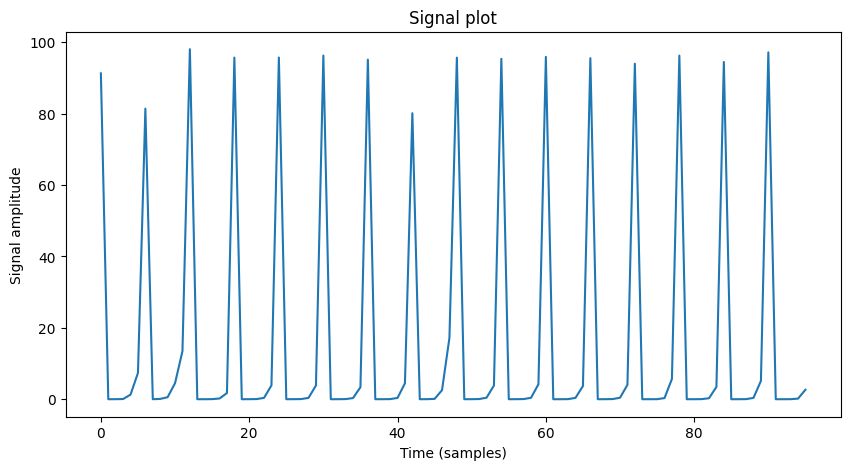

In [22]:
# Load the CSV file into a DataFrame
signal = np.load("datasets/features/rwb/segment_1 seconds/autism_256/bader/Bader_segment_1043.csv_bispectrum.npy")

# Extract the signal values from the DataFrame

# Create a time axis for the signal
t = range(len(signal))

fig, ax = plt.subplots(figsize=(10, 5))
# Plot the signal
ax.plot(t, signal)
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Signal amplitude')
ax.set_title('Signal plot')
plt.show()

### Model Definition

In [10]:
def create_model():
    model = keras.models.Sequential()

    model.add(layers.Input(shape=(96,)))
    model.add(layers.Reshape((96, 1)))

    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation="relu"))

    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(256, activation="relu"))

    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(1, activation="sigmoid"))

    return model

### Define Callbacks

In [11]:
def myCallbacks(log_dir):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='acc',
    patience=50,
    mode='max')
    model_path = os.path.join(log_dir,'best_model.h5')
    mc = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    return [tensorboard_callback, early_stopping, mc]
    

### Main Program

In [15]:
lags = [256, 128, 64, 32, 16, 8, 4, 2]
folds = ['train_1', 'test_1', 'epoch_1', 'train_2', 'test_2', 'epoch_2']
time_measured = ['Wall_Time_1', 'CPU_Time_1', 'Wall_Time_2', 'CPU_Time_2']
epochs = 2000
log_dirs = ['train_logs/logs1/RWB_ANN']

In [16]:
for log_dir in log_dirs:
    recap = pd.DataFrame(index=lags, columns=folds)
    training_time = pd.DataFrame(index=lags, columns=time_measured)
    for fold in range(1,3):
        for lag in lags:
            if fold == 2:
                train_dir, test_dir = test_dir, train_dir
            
            train_temp_dir = train_dir + '_' + str(lag)
            test_temp_dir = test_dir + '_' + str(lag)

            train = tf.data.Dataset.load(train_temp_dir)
            test_ds = tf.data.Dataset.load(test_temp_dir)

            train_size = int(len(list(train.as_numpy_iterator()))*0.8)
            train_ds = train.take(train_size)
            val_ds = train.skip(train_size)

            log_path = os.path.join(log_dir, str(fold), str(lag))

            model = create_model()
            model.summary()

            model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

            cpu_start = time.process_time()
            wt_start = time.time()

            history = model.fit(train_ds, epochs=epochs, validation_data=(val_ds), callbacks = myCallbacks(log_path))

            wt_end = time.time()
            cpu_end = time.process_time()
            wall_time = wt_end - wt_start
            cpu_time = cpu_end - cpu_start
            training_time.loc[lag, 'CPU_Time'+ '_' + str(fold)] = cpu_time
            training_time.loc[lag, 'Wall_Time'+ '_' + str(fold)] = wall_time

            results = model.evaluate(test_ds, callbacks = myCallbacks(log_path))

            recap.loc[lag, 'train'+ '_' + str(fold)] = history.history['acc']
            recap.loc[lag, 'test'+ '_' + str(fold)] = results[1]
            recap.loc[lag, 'epoch'+ '_' + str(fold)] = len(history.history['acc'])
    log_dir = os.path.join(log_dir,'Recap')
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
    recap.to_csv(os.path.join(log_dir,'recap.csv'))
    training_time.to_csv(os.path.join(log_dir,'Training_time.csv'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 96, 1)             0         
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 512)               49664     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2

KeyboardInterrupt: 

In [27]:
# for log_dir in log_dirs:
#     recap = pd.DataFrame(index=lags, columns=folds)
#     training_time = pd.DataFrame(index=lags, columns=time_measured)
#     for fold in range(1,3):
#         for lag in lags:
#             if fold == 2:
#                 train_dir, test_dir = test_dir, train_dir
            
#             train_temp_dir = train_dir + '_' + str(lag)
#             test_temp_dir = test_dir + '_' + str(lag)

#             train = get_batch(train_temp_dir)
#             test_ds = get_batch(test_temp_dir)

#             train_size = int(len(list(train.as_numpy_iterator()))*0.8)
#             train_ds = train.take(train_size)
#             val_ds = train.skip(train_size)

#             log_path = os.path.join(log_dir, str(fold), str(lag))

#             model = create_model()
#             model.summary()

#             model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

#             cpu_start = time.process_time()
#             wt_start = time.time()

#             history = model.fit(train_ds, epochs=epochs, validation_data=(val_ds), callbacks = myCallbacks(log_path))

#             wt_end = time.time()
#             cpu_end = time.process_time()
#             wall_time = wt_end - wt_start
#             cpu_time = cpu_end - cpu_start
#             training_time.loc[lag, 'CPU_Time'+ '_' + str(fold)] = cpu_time
#             training_time.loc[lag, 'Wall_Time'+ '_' + str(fold)] = wall_time

#             results = model.evaluate(test_ds, callbacks = myCallbacks(log_path))

#             recap.loc[lag, 'train'+ '_' + str(fold)] = history.history['acc']
#             recap.loc[lag, 'test'+ '_' + str(fold)] = results[1]
#             recap.loc[lag, 'epoch'+ '_' + str(fold)] = len(history.history['acc'])
#     log_dir = os.path.join(log_dir,'Recap')
#     if not os.path.exists(log_dir):
#         os.makedirs(log_dir)
#     recap.to_csv(os.path.join(log_dir,'recap.csv'))
#     training_time.to_csv(os.path.join(log_dir,'Training_time.csv'))

In [5]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [7]:
! tensorboard --logdir c:/Users/farra/Documents/Pribadi/EEG/EEG-Autism-Classification --port=8000

^C


In [ ]:
%tensorboard --logdir logs --port=8000

In [30]:
! cd

c:\Users\farra\Documents\Pribadi\EEG\EEG-Autism-Classification
